# Dipam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import pi

In [2]:
#gathering data
data=pd.read_csv('Student Gradebook - August.csv')

In [3]:
data.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,0,AjKyaUkhada,2019-08-01 13:26:57,Ritual,Consistency,Sonali,0,2.0,2,0
1,0,AjKyaUkhada,2019-08-01 14:40:42,Ritual,Consistency,Chandrima,0,2.0,2,0
2,0,AjKyaUkhada,2019-08-01 14:44:34,Ritual,Consistency,Purbita,0,2.0,2,0
3,0,AjKyaUkhada,2019-08-01 14:47:05,Ritual,Consistency,Kunal,0,2.0,2,0
4,0,AjKyaUkhada,2019-08-01 14:48:11,Ritual,Consistency,Kaushal,0,2.0,2,0


In [4]:
data_august=data  #basically to understand that it is the dataset of august

In [5]:
data_august.shape   

(911, 10)

In [6]:
data_july=pd.read_csv('Student Gradebook - July.csv')

In [7]:
data_july.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0
1,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0
2,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Durga,0,6.0,10,0
3,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Kaushal,0,7.0,10,0
4,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Arya,0,6.0,10,0


In [8]:
data_july.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner'],
      dtype='object')

In [9]:
#data cleaning
#data_july.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22'],inplace=True)

In [10]:
data_july.shape

(225, 10)

In [11]:
data_september=pd.read_csv('Student Gradebook - September.csv')

In [12]:
data_september.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Sonali,0,1.0,1,0
1,0,Knowledge Sharing,2019-09-10 1:27:50,Ritual,"Consistency,Curiosity",Prasoon,0,1.0,1,0
2,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Durga,0,1.0,1,0
3,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Purbita,0,1.0,1,0
4,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Ujjainee,0,1.0,1,0


In [13]:
data=pd.concat([data_july,data_august,data_september])

In [14]:
data.shape

(1589, 10)

In [15]:
data_august.shape

(911, 10)

In [16]:
data_august.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner'],
      dtype='object')

In [17]:
data.fillna({'Student':'No Student'},inplace=True)
data.fillna({'Task':'No Task'},inplace=True)
data.fillna({'Date':'0'},inplace=True)
data.fillna({'Module':'No Module'},inplace=True)
data.fillna({'Type':'No Type'},inplace=True)
data.fillna({'Late Submission':'0'},inplace=True)
data.fillna({'Points':'0.0'},inplace=True)
data.fillna({'Total':'0'},inplace=True)
data.fillna({'Task Winner':'0'},inplace=True)
data.fillna({'id':'0'},inplace=True)

In [18]:
data.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner'],
      dtype='object')

In [19]:
data['Points']=data['Points'].astype(float)

In [20]:
#data=data.drop(0)
#data=data.drop([299,429,1492])
#data=data.drop([151,376,912])
#data=data.drop([316])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 452
Data columns (total 10 columns):
id                 1589 non-null int64
Task               1589 non-null object
Date               1589 non-null object
Module             1589 non-null object
Type               1589 non-null object
Student            1589 non-null object
Late Submission    1589 non-null int64
Points             1589 non-null float64
Total              1589 non-null int64
Task Winner        1589 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 136.6+ KB


In [22]:
a=data['Task'].value_counts().index
highest=[]
for i in a:
    highest.append(max(data[data['Task']==i]['Points']))

In [23]:
data_highest_table = {'Task':a, 'Highest':highest} 
data_high=pd.DataFrame(data_highest_table)
data=data.merge(data_high, on='Task')

# creating a function where we have entered the name of the student 

In [24]:
def student(name):
    data_tasks=data
    data_student=data_tasks[data_tasks['Student']==name] 
    print("THE NAME OF THE STUDENT: ",name)
    x=data_student['Total'].sum()
    print("TOTAL MARKS OF THE TASKS: ",x)
    y=data_student['Points'].sum()
    print("THE MARKS OBTAINED BY THE STUDENT: ",y)
    average=(y/x)*100
    print("THE PERCENTAGE: ",average,"%")
    if(average>=90):
        print("GRADE: 0 (OUTSTANDING)")
    elif(average>=80):
        print("GRADE: E (EXCELLENT)")
    elif(average>=70):
        print("GARDE: A++ (VERY GOOD)")
    elif(average>=60):
        print("GRADE: A (GOOD)")
    elif(average)>=50:
        print("GRADE: B (FAIR)")
    elif(average>=40):
        print("GARDE: C (SATISFACTORY)")
    elif(average>=30):
        print("GARDE: D (TRY TO IMPROVE)")
    else:
        print("GRADE: F (FAIL)")
    m=len(data_student[data_student['Task Winner']==1])
    print("TASK WINNER: ",m,"times")
    data_profile=data_student[data_student['Module']=='Profile Building']
    data_profile_marks=(data_profile['Points'].sum()/data_profile['Total'].sum())*100
    print("PROFILE BULIDING PERCENTILE: ",data_profile_marks,"%")
    data_consistency=data[data['id']==0]
    data_consistency_student=data_consistency[data_consistency['Student']==name]
    a=len(data_consistency[data_consistency['Student']==name])
    b=len(data_consistency_student[data_consistency_student['Task']=='Knowledge Sharing'])
    knowledge=(b/a)*100
    print("KNOWLEDGE SHARING PERCENTILE: ",knowledge,"%")
    print("Result Analysis")
    x1=data_student.pivot_table(index='Module',values='Points',aggfunc='sum')
    y1=data_student.pivot_table(index='Module',values='Total',aggfunc='sum')
    w1=data_student.pivot_table(index='Module',values='Highest',aggfunc='sum')
    z1=pd.concat([x1,y1,w1],axis=1)
    subject_percentile=[x1['Points']/y1['Total']*100]
    z1['Percentile']=" "
    for i in range(len(z1)):
        z1['Percentile'][i]=subject_percentile[0][i]
    print(z1)

In [25]:
student('Shakib')

THE NAME OF THE STUDENT:  Shakib
TOTAL MARKS OF THE TASKS:  394
THE MARKS OBTAINED BY THE STUDENT:  361.0
THE PERCENTAGE:  91.6243654822335 %
GRADE: 0 (OUTSTANDING)
TASK WINNER:  3 times
PROFILE BULIDING PERCENTILE:  86.47058823529412 %
KNOWLEDGE SHARING PERCENTILE:  13.333333333333334 %
Result Analysis
                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 116.0    125    123.5       92.8
Introduction to Data Science    37.5     50     43.0         75
Machine Learning                 5.0      5      5.0        100
Profile Building                73.5     85     81.0    86.4706
Ritual                         129.0    129    150.0        100


C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
student('Dipam')

THE NAME OF THE STUDENT:  Dipam
TOTAL MARKS OF THE TASKS:  414
THE MARKS OBTAINED BY THE STUDENT:  366.5
THE PERCENTAGE:  88.52657004830918 %
GRADE: E (EXCELLENT)
TASK WINNER:  1 times
PROFILE BULIDING PERCENTILE:  76.47058823529412 %
KNOWLEDGE SHARING PERCENTILE:  21.176470588235293 %
Result Analysis


C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 115.0    125    123.5         92
Introduction to Data Science    32.5     50     43.0         65
Machine Learning                 5.0      5      5.0        100
Profile Building                65.0     85     81.0    76.4706
Ritual                         149.0    149    170.0        100


In [27]:
data_dipam_full=data[data['Student']=='Dipam']

In [28]:
a=data_dipam_full['Module'].value_counts().index.tolist()

In [29]:
x=data_dipam_full.pivot_table(index='Module',values='Points',aggfunc='sum')

In [30]:
y=data_dipam_full.pivot_table(index='Module',values='Total',aggfunc='sum')

In [31]:
w=data_dipam_full.pivot_table(index='Module',values='Highest',aggfunc='sum')

In [32]:
z=pd.concat([x,y,w],axis=1)

In [33]:
subject_percentile=[x['Points']/y['Total']*100]

In [34]:
subject_percentile[0][1]

65.0

In [35]:
z['Percentile']=" "
for i in range(len(z)):
    z['Percentile'][i]=subject_percentile[0][i]

C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
z

,Points,Total,Highest,Percentile
Module,,,,
Data Analytics,115.0,125,123.5,92
Introduction to Data Science,32.5,50,43.0,65
Machine Learning,5.0,5,5.0,100
Profile Building,65.0,85,81.0,76.4706
Ritual,149.0,149,170.0,100


In [37]:
z.to_html('z.html')

In [38]:
from datetime import datetime
from datetime import date
from datetime import time

In [39]:
student('Kunal')

THE NAME OF THE STUDENT:  Kunal
TOTAL MARKS OF THE TASKS:  396
THE MARKS OBTAINED BY THE STUDENT:  372.5
THE PERCENTAGE:  94.06565656565657 %
GRADE: 0 (OUTSTANDING)
TASK WINNER:  4 times
PROFILE BULIDING PERCENTILE:  90.58823529411765 %
KNOWLEDGE SHARING PERCENTILE:  10.666666666666668 %
Result Analysis
                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 117.0    125    123.5       93.6
Introduction to Data Science    42.5     50     43.0         85
Machine Learning                 5.0      5      5.0        100
Profile Building                77.0     85     81.0    90.5882
Ritual                         131.0    131    150.0        100


C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
user=pd.read_csv('users - users.csv')

In [41]:
def user_info(student):
    data=user[user['fname']==student]
    print("EMAIL: ",data['email'])
    print("COLLEGE: ",data['college'])
    print("STREAM: ",data['branch'])
    print("GITHUB LINK: ",data['github'])

In [42]:
user_info('Dipam')

EMAIL:  5    dipamhazra1999@gmail.com
Name: email, dtype: object
COLLEGE:  5    St. Thomas' College of Engineering and Technology
Name: college, dtype: object
STREAM:  5    CSE
Name: branch, dtype: object
GITHUB LINK:  5    https://github.com/DIPAM9
Name: github, dtype: object


In [43]:
user.head()

,user_id,batch_id,fname,lname,email,password,dp,college,passing_year,branch,github,medium,portfolio,linkedin
0,1,1,Durga,Agarwal,durgaa219@gmail.com,NaN,avatar.jpg,"UEM, Kolkata",2021,CSE,https://github.com/durgaag,https://medium.com/@durgaa219,https://sites.google.com/view/durgaag-portfoli...,https://www.linkedin.com/in/durga-agarwal-5282...
1,2,1,Sharika,Anjum Mondal,sharikaanjumm@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2022,ECE,https://github.com/sharika-anjum,https://medium.com/@sharikaanjumm,https://sites.google.com/view/sharikas-portfolio,https://www.linkedin.com/in/sharika-anjum-mond...
2,3,1,Swaastick,Singh,meightpc@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2022,CSE,https://github.com/mightomi,https://medium.com/@meightpc_14421,https://sites.google.com/view/meight/home,https://www.linkedin.com/in/swaastick/
3,4,1,Apurwa,Arya,aryaapurwa08@gmail.com,NaN,avatar.jpg,"UEM, Kolkata",2021,CSE,https://github.com/aryaapurwa08,https://medium.com/@aryaapurwa08,https://sites.google.com/view/apurwaaryaeportf...,https://www.linkedin.com/in/apurwa-arya-2b9988157
4,5,1,Purbita,Sur,purbita1998@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2021,CSE,https://github.com/purbita-sur,https://medium.com/@purbita1998,https://sites.google.com/view/purbitasur/home,https://www.linkedin.com/in/purbita-sur


In [44]:
df=pd.read_html('z.html')

In [45]:
df[0].values.tolist()

[['Data Analytics', 115.0, 125, 123.5, 92.0],
 ['Introduction to Data Science', 32.5, 50, 43.0, 65.0],
 ['Machine Learning', 5.0, 5, 5.0, 100.0],
 ['Profile Building', 65.0, 85, 81.0, 76.4706],
 ['Ritual', 149.0, 149, 170.0, 100.0]]

# creaating the class

In [46]:
class info_of_student():
   def student(name):
    data_tasks=data
    data_student=data_tasks[data_tasks['Student']==name] 
    name=name
    college=user[user['fname']==student]['college']
    branch=user[user['fname']==student]['branch']
    Date=str(today.strftime("%d/%m/%Y"))
    Number_of_task_wins=str(len(data_student[data_student['Task Winner']==1]))
    total_marks=data_student['Total'].sum()
    obtained_marks=data_student['Points'].sum()
    average=(obtaied_marks/total_marks)*100
    data_profile=data_student[data_student['Module']=='Profile Building']
    data_profile_marks=(data_profile['Points'].sum()/data_profile['Total'].sum())*100
    profile_building_percentile=data_profile_marks
    data_consistency=data[data['id']==0]
    data_consistency_student=data_consistency[data_consistency['Student']==name]
    a=len(data_consistency[data_consistency['Student']==name])
    b=len(data_consistency_student[data_consistency_student['Task']=='Knowledge Sharing'])
    knowledge=(b/a)*100
    knowledge_sharing_percentile=knowledge
    x1=data_student.pivot_table(index='Module',values='Points',aggfunc='sum')
    y1=data_student.pivot_table(index='Module',values='Total',aggfunc='sum')
    w1=data_student.pivot_table(index='Module',values='Highest',aggfunc='sum')
    z1=pd.concat([x1,y1,w1],axis=1)
    subject_percentile=[x1['Points']/y1['Total']*100]
    z1['Percentile']=" "
    for i in range(len(z1)):
        z1['Percentile'][i]=subject_percentile[0][i]
    z1.to_html('z_total.html')
    df=pd.read_html('z_total.html')
    Table_elements=df[0].values.tolist()

In [47]:
data_september[data_september['Student']=='Dipam'].head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
8,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Dipam,0,1.0,1,0
24,12,Web Scraping,9/11/2019,Data Analytics,"Knowledge,Patience",Dipam,1,10.0,10,1
43,0,AjKyaUkhada,2019-09-11 16:06:50,Ritual,Consistency,Dipam,0,1.0,1,0
58,0,Knowledge Sharing,2019-09-12 1:27:50,Ritual,"Consistency,Curiosity",Dipam,0,1.0,1,0
64,0,AjKyaUkhada,2019-09-12 15:45:30,Ritual,Consistency,Dipam,0,1.0,1,0


In [48]:
m=data_september.groupby('Student')['Points'].sum().sort_values(ascending=False)

In [49]:
n=data.groupby('Student')['Points'].sum().sort_values(ascending=False)

In [50]:
data_dipam_full['Points'].sum()

366.5

In [51]:
data_september[data_september['Student']=='Dipam']['Points'].sum()

113.0

In [53]:
a1=data_september['Task'].value_counts().index
highest_september=[]
for i in a1:
    highest_september.append(max(data_september[data_september['Task']==i]['Points']))
data_highest_table_september = {'Task':a1, 'Highest':highest_september} 
data_high_september=pd.DataFrame(data_highest_table_september)
data_september=data_september.merge(data_high_september, on='Task')

In [54]:
data_dipam_full_sep=data_september[data_september['Student']=='Dipam']
x1=data_dipam_full_sep.pivot_table(index='Module',values='Points',aggfunc='sum')
y1=data_dipam_full_sep.pivot_table(index='Module',values='Total',aggfunc='sum')
w1=data_dipam_full_sep.pivot_table(index='Module',values='Highest',aggfunc='sum')
z1=pd.concat([x1,y1,w1],axis=1)
subject_percentile=[x1['Points']/y1['Total']*100]
z1['Percentile']=" "
for i in range(len(z1)):
    z1['Percentile'][i]=subject_percentile[0][i]
z1

C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Points,Total,Highest,Percentile
Module,,,,
Data Analytics,92.0,95,95.0,96.8421
Ritual,21.0,21,21.0,100


In [55]:
z1.rename(columns={'Points':'Points_month','Total':'Total_month','Percentile':'Percentile_month','Highest':'Highest_month'},inplace=True)

In [56]:
z_comparison=pd.concat([z,z1],axis=1)

C:\Users\Shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# comparison of month vs total

In [57]:
z_comparison

,Points,Total,Highest,Percentile,Points_month,Total_month,Highest_month,Percentile_month
Data Analytics,115.0,125,123.5,92,92.0,95.0,95.0,96.8421
Introduction to Data Science,32.5,50,43.0,65,NaN,NaN,NaN,NaN
Machine Learning,5.0,5,5.0,100,NaN,NaN,NaN,NaN
Profile Building,65.0,85,81.0,76.4706,NaN,NaN,NaN,NaN
Ritual,149.0,149,170.0,100,21.0,21.0,21.0,100


In [58]:
list(z.index)

['Data Analytics',
 'Introduction to Data Science',
 'Machine Learning',
 'Profile Building',
 'Ritual']

In [59]:
labels=np.array(z.index)

In [60]:
labels

array(['Data Analytics', 'Introduction to Data Science',
       'Machine Learning', 'Profile Building', 'Ritual'], dtype=object)

In [61]:
points=[]
for i in range(len(z)):
    points.append(z.values[i][0])

stats=points

In [62]:
stats

[115.0, 32.5, 5.0, 65.0, 149.0]

In [63]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

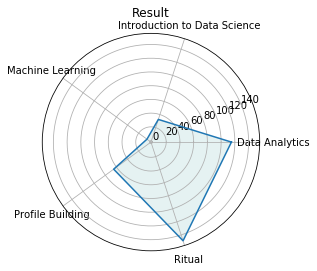

In [64]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],labels)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,stats)

#Fill in the area plotted in the last line
ax.fill(angles, stats, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Result")
plt.show()

In [65]:
def plot(data):
    labels=np.array(data.index)
    stats=data.values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1],labels)
    ax.plot(angles,stats)
    ax.fill(angles, stats, 'teal', alpha=0.1)
    ax.set_title("Result")
    plt.show()

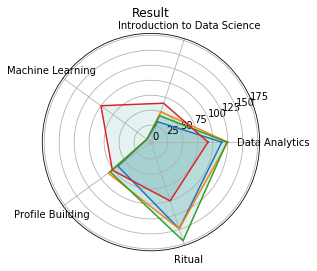

In [66]:
plot(z)

In [73]:
z.values

array([[115.0, 125, 123.5, 92.0],
       [32.5, 50, 43.0, 65.0],
       [5.0, 5, 5.0, 100.0],
       [65.0, 85, 81.0, 76.47058823529412],
       [149.0, 149, 170.0, 100.0]], dtype=object)

C:\Users\Shakib\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


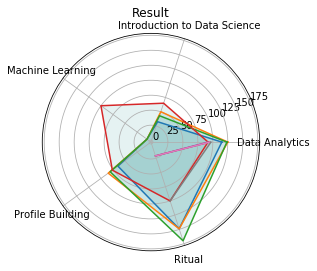

In [67]:
plot(z_comparison)

In [68]:
points=[]
for i in range(len(z_total)):
    points.append(z_total.values[i][0])

NameError: name 'z_total' is not defined

In [69]:
points

[]

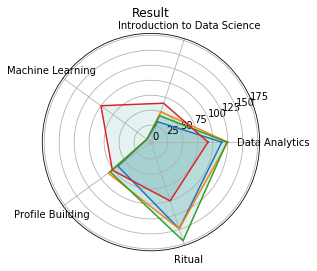

In [70]:
plot(z)

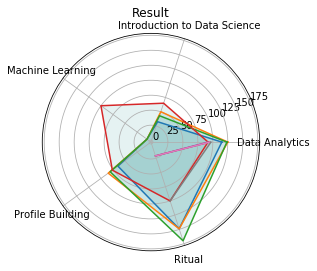

In [71]:
plot(z_comparison)